In [10]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/Users/nguyentoan/Documents/vgsales.csv')

In [12]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


KeyError: ' Platform'

In [15]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [17]:
# tao tinh tuong tac cho duong ong
idf = df.interactive()

In [18]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=1980, end=2020, step=5, value=1980)
year_slider

IntSlider(end=2020, name='Year slider', start=1980, step=5, value=1980)

In [19]:

scatter_plot = hv.Scatter(df, 'Year', 'Global_Sales')
def update_plot():
    return scatter_plot

panel = pn.Column(
    "# Biểu đồ từ hai cột trong DataFrame",
    update_plot
)

# Hiển thị Dashboard Panel
panel.servable()

Column
    [0] Markdown(str)
    [1] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Scatter, name='interactive00828')

In [20]:
total_global = pn.widgets.RadioButtonGroup(
    name='total', 
    options=['Other_Sales', 'Global_Sales',],
    button_type='success'
)

In [21]:
def create_plot(year, total):
    if total == 'Global_Sales':
        y_axis = 'Global_Sales'
    else:
        y_axis = 'Other_Sales'
    
    plot = df[df['Year'] <= year].hvplot.line(x='Year', y=y_axis, xlabel='Year', ylabel=total, title=f'{total} by Year')
    return plot
# Tạo Dashboard Panel
@pn.depends(year_slider.param.value, total_global.param.value)
def update_plot(year, total):
    return create_plot(year, total)


panel = pn.Column(
    "# Biểu đồ từ hai cột trong DataFrame",
    year_slider,
    total_global,
    update_plot
)

# Hiển thị Dashboard Panel
panel.servable()

Column
    [0] Markdown(str)
    [1] IntSlider(end=2020, name='Year slider', start=1980, step=5, value=1995)
    [2] RadioButtonGroup(button_type='success', name='total', options=['Other_Sales', ...], value='Other_Sales')
    [3] ParamFunction(function)

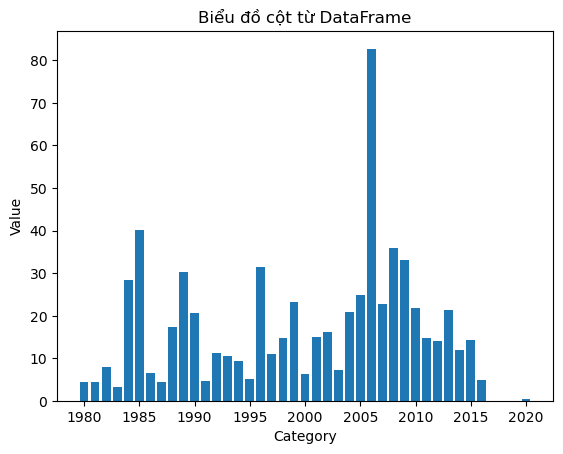

In [16]:
plt.bar(df['Year'],df['Global_Sales'])

# Đặt tiêu đề cho biểu đồ và các trục
plt.title('Biểu đồ cột từ DataFrame')
plt.xlabel('Category')
plt.ylabel('Value')

# Hiển thị biểu đồ
plt.show()